In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


C:\Users\ishwa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load CIFAR-10 dataset
(itrain, ltrain), (itest, ltest) = cifar10.load_data()


In [3]:
# Preprocess the data
itrain = itrain / 255.0
itest = itest / 255.0
ltrain = to_categorical(ltrain)
ltest = to_categorical(ltest)

In [4]:
# Load pre-trained VGG16 model (excluding the top fully-connected layers)
basem = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [5]:
# Freeze the pre-trained layers
for layer in basem.layers:
   layer.trainable = False

In [6]:
#c. Add custom classifier with several layers of trainable parameters to model
from tensorflow.keras.models import Model
x = Flatten()(basem.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=basem.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Create a new model on top
semodel = Sequential()
semodel.add(basem)
semodel.add(Flatten())
semodel.add(Dense(256, activation='relu'))
semodel.add(Dense(10, activation='softmax'))  # CIFAR-10 has 10 classe

In [8]:
# Compile the model
semodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#d. Train classifier layers on training data available for task
# Train the model
semodel.fit(itrain, ltrain, epochs=2, batch_size=32, validation_data=(itest, ltest))

Epoch 1/2
1563/1563 [==============================] - 166s 106ms/step - loss: 1.3445 - accuracy: 0.5281 - val_loss: 1.2405 - val_accuracy: 0.5614
Epoch 2/2
1563/1563 [==============================] - 181s 116ms/step - loss: 1.1707 - accuracy: 0.5909 - val_loss: 1.1767 - val_accuracy: 0.5863


In [10]:
# Evaluate the model on test data
ltest, atest = semodel.evaluate(itest, ltest)
print("Test accuracy:", atest)

313/313 [==============================] - 24s 76ms/step - loss: 1.1767 - accuracy: 0.5863
Test accuracy: 0.5863000154495239


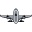

In [11]:
from PIL import Image
img = Image.open("plane323.jpg")
img

In [12]:
import numpy as np
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.array([img])

In [13]:
res = semodel.predict(img)

1/1 [==============================] - 0s 201ms/step


In [14]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
labels[res.argmax()]

'horse'